## EDS 217 Day 4 Practice
### 2023-09-11

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Practice 1

In [2]:
data_url = "https://raw.githubusercontent.com/environmental-data-science" \
            "/eds217_2023/main/data/BSRN_GOB_2019-10.csv"

In [3]:
bsrn = pd.read_csv(data_url)

### Practice 2

- Print a list of your DataFrame’s column names.
- How many values are there in the entire DataFrame?
- What is the data type of the first column?

In [4]:
bsrn.columns

Index(['DATE', 'H_m', 'SWD_Wm2', 'STD_SWD', 'DIR_Wm2', 'STD_DIR', 'DIF_Wm2',
       'STD_DIF', 'LWD_Wm2', 'STD_LWD', 'SWU_Wm2', 'LWU_Wm2', 'T_degC', 'RH',
       'P_hPa'],
      dtype='object')

In [5]:
bsrn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44640 entries, 0 to 44639
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     44640 non-null  object 
 1   H_m      44640 non-null  int64  
 2   SWD_Wm2  44630 non-null  float64
 3   STD_SWD  44637 non-null  float64
 4   DIR_Wm2  44623 non-null  float64
 5   STD_DIR  44623 non-null  float64
 6   DIF_Wm2  44632 non-null  float64
 7   STD_DIF  44632 non-null  float64
 8   LWD_Wm2  44589 non-null  float64
 9   STD_LWD  44637 non-null  float64
 10  SWU_Wm2  44640 non-null  int64  
 11  LWU_Wm2  44640 non-null  int64  
 12  T_degC   44640 non-null  float64
 13  RH       44640 non-null  float64
 14  P_hPa    44640 non-null  int64  
dtypes: float64(10), int64(4), object(1)
memory usage: 5.1+ MB


In [7]:
type(bsrn.iloc[0])

pandas.core.series.Series

In [11]:
bsrn.head(10)

,DATE,H_m,SWD_Wm2,STD_SWD,DIR_Wm2,STD_DIR,DIF_Wm2,STD_DIF,LWD_Wm2,STD_LWD,SWU_Wm2,LWU_Wm2,T_degC,RH,P_hPa
0,2019-10-01 00:00:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.2,30.7,966
1,2019-10-01 00:01:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.3,0,383,16.4,30.7,966
2,2019-10-01 00:02:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.2,0,383,16.5,30.5,966
3,2019-10-01 00:03:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.5,30.4,966
4,2019-10-01 00:04:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.8,30.5,966
5,2019-10-01 00:05:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,300.0,0.2,0,383,16.9,30.5,966
6,2019-10-01 00:06:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,300.0,0.2,0,383,16.8,30.4,966
7,2019-10-01 00:07:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,300.0,0.1,0,384,17.0,31.0,966
8,2019-10-01 00:08:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,300.0,0.2,0,384,16.7,30.6,966
9,2019-10-01 00:09:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,301.0,0.3,0,384,17.1,30.6,966


### Practice 3

- Create a new DataFrame containing the first record for each day and the following columns: the timestamp of the record, incoming shortwave radiation, direct and diffuse radiation, and incoming longwave radiation. (Hint: the BSRN station collects data every minute).


In [19]:
bsrn = pd.read_csv(data_url)
bsrn['DATE'] = pd.to_datetime(bsrn['DATE'])
#bsrn.set_index('DATE', inplace=True)

bsrn.DATE.dt.time


0        00:00:00
1        00:01:00
2        00:02:00
3        00:03:00
4        00:04:00
           ...   
44635    23:55:00
44636    23:56:00
44637    23:57:00
44638    23:58:00
44639    23:59:00
Name: DATE, Length: 44640, dtype: object

In [34]:
bsrn['is_first_observation'] = bsrn.DATE.dt.time == bsrn.DATE.dt.time[0]
# bsrn.head(24)

In [28]:
first_day_df = bsrn[bsrn.DATE.dt.time == bsrn.DATE.dt.time[0]
                    ][
                            ['DATE', 'SWU_Wm2', 'DIR_Wm2', 'DIF_Wm2']
                    ]
first_day_df
# or could have indexed for every 1440 rows

,DATE,SWU_Wm2,DIR_Wm2,DIF_Wm2
0,2019-10-01,0,0.0,-3.0
1440,2019-10-02,0,0.0,-2.0
2880,2019-10-03,0,0.0,-2.0
4320,2019-10-04,0,0.0,-3.0
5760,2019-10-05,0,0.0,-2.0
7200,2019-10-06,0,0.0,-3.0
8640,2019-10-07,0,0.0,-3.0
10080,2019-10-08,0,0.0,-3.0
11520,2019-10-09,0,0.0,-2.0
12960,2019-10-10,0,0.0,-2.0


In [29]:
# OR using iloc

bsrn.iloc[
    ::1440
][
    ['DATE', 'SWU_Wm2', 'DIR_Wm2', 'DIF_Wm2']
]

,DATE,SWU_Wm2,DIR_Wm2,DIF_Wm2
0,2019-10-01,0,0.0,-3.0
1440,2019-10-02,0,0.0,-2.0
2880,2019-10-03,0,0.0,-2.0
4320,2019-10-04,0,0.0,-3.0
5760,2019-10-05,0,0.0,-2.0
7200,2019-10-06,0,0.0,-3.0
8640,2019-10-07,0,0.0,-3.0
10080,2019-10-08,0,0.0,-3.0
11520,2019-10-09,0,0.0,-2.0
12960,2019-10-10,0,0.0,-2.0



- Create a new Series containing the temperature values every hour at the top of the hour.


In [43]:
temps_series = bsrn.iloc[::60]['T_degC'] # get every 60th row, which is every hour on the hour
type(temps_series)
temps_series

0        16.2
60       18.2
120      18.0
180      17.9
240      18.1
         ... 
44340    27.1
44400    23.6
44460    22.7
44520    22.0
44580    23.1
Name: T_degC, Length: 744, dtype: float64



- Convert the DATE column to datetime using the pd.to_datetime() function.


In [44]:
# already did this above :)


- Set the DATE column as the index of the DataFrame using the set_index() method.

In [49]:
bsrn = pd.read_csv(data_url)
bsrn['DATE'] = pd.to_datetime(bsrn['DATE'])
bsrn.set_index('DATE', inplace=True)
bsrn

,H_m,SWD_Wm2,STD_SWD,DIR_Wm2,STD_DIR,DIF_Wm2,STD_DIF,LWD_Wm2,STD_LWD,SWU_Wm2,LWU_Wm2,T_degC,RH,P_hPa
DATE,,,,,,,,,,,,,,
2019-10-01 00:00:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.2,30.7,966
2019-10-01 00:01:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.3,0,383,16.4,30.7,966
2019-10-01 00:02:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.2,0,383,16.5,30.5,966
2019-10-01 00:03:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.5,30.4,966
2019-10-01 00:04:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.8,30.5,966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-31 23:55:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,380.0,0.1,0,423,23.0,35.6,964
2019-10-31 23:56:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,380.0,0.1,0,423,23.1,35.5,964
2019-10-31 23:57:00,2,-2.0,0.0,0.0,0.0,-2.0,0.0,380.0,0.1,0,423,23.0,35.3,964


## Practice 4

Calculate the mean incoming shortwave, outgoing shortwave, incoming longwave, and outgoing longwave radiation over the entire month.

In [51]:
bsrn[['SWD_Wm2', 'SWU_Wm2', 'LWD_Wm2', 'LWU_Wm2']].mean()

SWD_Wm2    318.046516
SWU_Wm2    110.445004
LWD_Wm2    342.350692
LWU_Wm2    455.054032
dtype: float64

## Practice 5

- Add a column ‘NET_SW’ to bsrn with the net shortwave radiation.


In [53]:
bsrn['NET_SW']  = bsrn['SWD_Wm2'] - bsrn['SWU_Wm2']
bsrn.head()

,H_m,SWD_Wm2,STD_SWD,DIR_Wm2,STD_DIR,DIF_Wm2,STD_DIF,LWD_Wm2,STD_LWD,SWU_Wm2,LWU_Wm2,T_degC,RH,P_hPa,NET_SW
DATE,,,,,,,,,,,,,,,
2019-10-01 00:00:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.2,30.7,966,-3.0
2019-10-01 00:01:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.3,0,383,16.4,30.7,966,-3.0
2019-10-01 00:02:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.2,0,383,16.5,30.5,966,-3.0
2019-10-01 00:03:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.5,30.4,966,-3.0
2019-10-01 00:04:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.8,30.5,966,-3.0


- Add a column ‘NET_LW’ to bsrn with the net longwave radiation.


In [54]:
bsrn['NET_LW']  = bsrn['LWD_Wm2'] - bsrn['LWU_Wm2']


- Add a column ‘NET_RAD’ to bsrn with the net total radiation.

In [56]:
bsrn['NET_RAD']  = bsrn['NET_SW'] + bsrn['NET_LW']
bsrn.head()

,H_m,SWD_Wm2,STD_SWD,DIR_Wm2,STD_DIR,DIF_Wm2,STD_DIF,LWD_Wm2,STD_LWD,SWU_Wm2,LWU_Wm2,T_degC,RH,P_hPa,NET_SW,NET_LW,NET_RAD
DATE,,,,,,,,,,,,,,,,,
2019-10-01 00:00:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.2,30.7,966,-3.0,-83.0,-86.0
2019-10-01 00:01:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.3,0,383,16.4,30.7,966,-3.0,-83.0,-86.0
2019-10-01 00:02:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.2,0,383,16.5,30.5,966,-3.0,-83.0,-86.0
2019-10-01 00:03:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.5,30.4,966,-3.0,-83.0,-86.0
2019-10-01 00:04:00,2,-3.0,0.0,0.0,0.0,-3.0,0.0,300.0,0.1,0,383,16.8,30.5,966,-3.0,-83.0,-86.0


- Create a new DataFrame with the day of the month and daily mean values of shortwave incoming, shortwave outgoing, longwave incoming, longwave outgoing radiation, and net total radiation. (Hint: use masking!).

In [74]:
daily_rad = []
for d in bsrn.index.day.unique():
    avg_SWD = bsrn.SWD_Wm2[bsrn.index.day == d].mean()
    avg_SWU = bsrn.SWU_Wm2[bsrn.index.day == d].mean()
    avg_LWD = bsrn.LWD_Wm2[bsrn.index.day == d].mean()
    avg_LWU = bsrn.LWU_Wm2[bsrn.index.day == d].mean()
    avg_NET = bsrn.NET_RAD[bsrn.index.day == d].mean()
    # Append the current day and these two values to our list of daily radiation values:
    daily_rad.append([d, avg_SWD, avg_SWU, avg_LWD, avg_LWU, avg_NET])

daily_radiation = pd.DataFrame(daily_rad, columns=['day', 'SW_in', 'SW_out', "LW_in", "LW_out", "NET_RAD"])
daily_radiation

,day,SW_in,SW_out,LW_in,LW_out,NET_RAD
0,1,325.336345,115.334028,321.219903,458.834028,72.366295
1,2,322.732453,113.939583,318.131341,448.486111,78.402643
2,3,298.635417,103.261806,330.516667,429.979861,95.910417
3,4,323.209173,113.222222,314.129526,439.990972,83.788153
4,5,296.861806,105.461806,324.660876,427.359722,88.569840
5,6,292.118915,104.219444,330.458333,428.665278,89.634214
6,7,339.848611,119.959722,303.437413,439.002778,84.256606
7,8,332.009028,116.752778,313.126653,438.550000,89.752262
8,9,290.577083,104.436806,342.506267,428.110417,100.719359
9,10,310.887500,108.638889,331.667130,434.941667,99.003475


In [65]:
# daily_rad_L = []
# for d in bsrn.index.day.unique():
#     avg_LWD = bsrn.LWD_Wm2[bsrn.index.day == d].mean()
#     avg_LWU = bsrn.LWU_Wm2[bsrn.index.day == d].mean()
#     # Append the current day and these two values to our list of daily radiation values:
#     daily_rad_L.append([d, avg_LWD, avg_LWU])

# daily_LW = pd.DataFrame(daily_rad_L, columns=['day', 'LW_in', 'LW_out'])
# # daily_LW

In [71]:
# daily_LW

In [70]:
# daily_rad_net = []
# for d in bsrn.index.day.unique():
#     avg_NET = bsrn.NET_RAD[bsrn.index.day == d].mean()
#     daily_rad_net.append([d, avg_NET])

# daily_NET = pd.DataFrame(daily_rad_net, columns=['day', 'NET_Rad'])
# #daily_NET

## Practice 6

Use a list of lists to construct a DataFrame named df1 containing the data in the table below. (on the website) 
https://environmental-data-science.github.io/eds217_2023/practice_sessions/practice_4-1_pandas.html#practice-6.

In [81]:
df1 = pd.DataFrame([
    ['Amazon', 6400, 7050000],
    ['Congo', 4371, 4014500],
    ['Yangtze', 6418, 1808500],
    ['Mississippi', 3730, 3202230]],
        columns=['River', 'Length', "Drainage_area"])
df1

,River,Length,Drainage_area
0,Amazon,6400,7050000
1,Congo,4371,4014500
2,Yangtze,6418,1808500
3,Mississippi,3730,3202230


Use a dict to construct a DataFrame named df2 containing the data in the table below.

In [82]:
df2 = pd.DataFrame({
    'River': ['Zambezi', 'Mekong', 'Murray', 'Rhone', 'Cubango'],
    'Length': [2574, 4023, 2508, 813, 1056],
    'Drainage_area': [1331000, 811000, 1061469, 98000, 530000]
})

df2

,River,Length,Drainage_area
0,Zambezi,2574,1331000
1,Mekong,4023,811000
2,Murray,2508,1061469
3,Rhone,813,98000
4,Cubango,1056,530000


Concatenate df1 and df2 into a new DataFrame with all 9 rivers.

In [91]:
temp_df = pd.concat([df1, df2], ignore_index=True)

In [92]:
temp_df

,River,Length,Drainage_area
0,Amazon,6400,7050000
1,Congo,4371,4014500
2,Yangtze,6418,1808500
3,Mississippi,3730,3202230
4,Zambezi,2574,1331000
5,Mekong,4023,811000
6,Murray,2508,1061469
7,Rhone,813,98000
8,Cubango,1056,530000


Create a new DataFrame rivers with the discharge, mouth, source, and continent information and add this to your DataFrame from (a) to produce a DataFrame with all of the data in the table below.

In [88]:
dmsc = pd.DataFrame({
    'Discharge': [209000, 41200, 30166, 16792, 3400, 16000, 767, 1710, 475],
    'Mouth': ['Atlantic Ocean', 'Atlantic Ocean', 'East China Sea', 'Gulf of Mexico', 'Indian Ocean', 'South China Sea', "Southern Ocean", "Mediterranean Sea", "Okavango Delta"],
    'Source': ['Rio Mantaro', 'Lualaba River', 'Jianggendiru Glaciers', 'Lake Itasca','Miombo Woodlands',  'Lasagongma Spring', 'Australian Alps', 'Rhône Glacier', 'Bié Plateau'],
    'Continent': ["South America", 'Africa', 'Asia', 'North America', 'Africa', 'Asia', "Oceania", 'Europe', 'Africa']
})
dmsc

,Discharge,Mouth,Source,Continent
0,209000,Atlantic Ocean,Rio Mantaro,South America
1,41200,Atlantic Ocean,Lualaba River,Africa
2,30166,East China Sea,Jianggendiru Glaciers,Asia
3,16792,Gulf of Mexico,Lake Itasca,North America
4,3400,Indian Ocean,Miombo Woodlands,Africa
5,16000,South China Sea,Lasagongma Spring,Asia
6,767,Southern Ocean,Australian Alps,Oceania
7,1710,Mediterranean Sea,Rhône Glacier,Europe
8,475,Okavango Delta,Bié Plateau,Africa


In [125]:
rivers = pd.concat([temp_df, dmsc], axis=1)
rivers = rivers.sort_values(by='Length', ascending=False)
rivers

,River,Length,Drainage_area,Discharge,Mouth,Source,Continent
2,Yangtze,6418,1808500,30166,East China Sea,Jianggendiru Glaciers,Asia
0,Amazon,6400,7050000,209000,Atlantic Ocean,Rio Mantaro,South America
1,Congo,4371,4014500,41200,Atlantic Ocean,Lualaba River,Africa
5,Mekong,4023,811000,16000,South China Sea,Lasagongma Spring,Asia
3,Mississippi,3730,3202230,16792,Gulf of Mexico,Lake Itasca,North America
4,Zambezi,2574,1331000,3400,Indian Ocean,Miombo Woodlands,Africa
6,Murray,2508,1061469,767,Southern Ocean,Australian Alps,Oceania
8,Cubango,1056,530000,475,Okavango Delta,Bié Plateau,Africa
7,Rhone,813,98000,1710,Mediterranean Sea,Rhône Glacier,Europe


In [152]:
discharge = rivers.sort_values(by="Discharge", ascending=False)
discharge

,River,Length,Drainage_area,Discharge,Mouth,Source,Continent
0,Amazon,6400,7050000,209000,Atlantic Ocean,Rio Mantaro,South America
1,Congo,4371,4014500,41200,Atlantic Ocean,Lualaba River,Africa
2,Yangtze,6418,1808500,30166,East China Sea,Jianggendiru Glaciers,Asia
3,Mississippi,3730,3202230,16792,Gulf of Mexico,Lake Itasca,North America
5,Mekong,4023,811000,16000,South China Sea,Lasagongma Spring,Asia
4,Zambezi,2574,1331000,3400,Indian Ocean,Miombo Woodlands,Africa
7,Rhone,813,98000,1710,Mediterranean Sea,Rhône Glacier,Europe
6,Murray,2508,1061469,767,Southern Ocean,Australian Alps,Oceania
8,Cubango,1056,530000,475,Okavango Delta,Bié Plateau,Africa


## Practice 7

Use the plt module to create a visualization of your radiation data and/or the rivers data. There are examples of plotting functions from our prior exercises. Also, don’t be afraid to experiment or try using GitHub CoPilot or ChatGPT to generate some intial code.

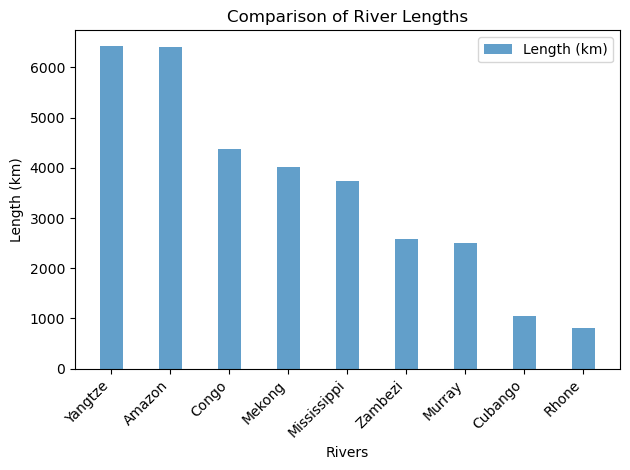

In [126]:
fig, ax = plt.subplots()

# Create a figure and axis
x = range(len(rivers))

# Set the positions for the bars
ax.bar(x, rivers.Length, width=0.4, label='Length (km)', align='center', alpha=0.7)

# Create the bar chart for river lengths
# ax.bar(x, rivers.Drainage_area, width=0.4, label='Drainage Area (sq km)', align='edge', alpha=0.7)

# Create the bar chart for drainage areas
ax.set_xticks(x)
ax.set_xticklabels(rivers.River)

# Add labels and a legend
plt.xlabel('Rivers')
plt.ylabel('Length (km)')
plt.title('Comparison of River Lengths')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

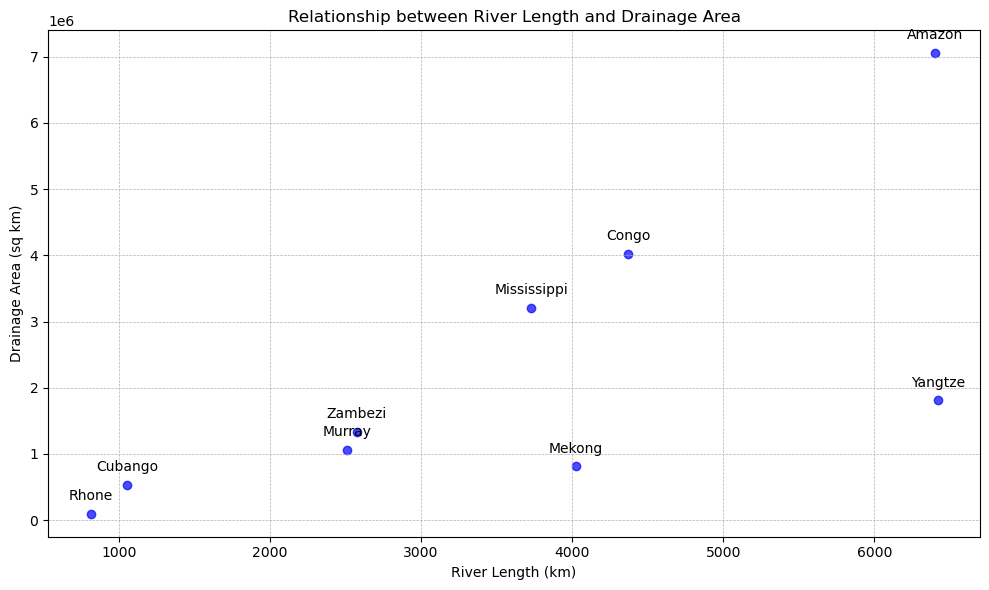

In [133]:
# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(rivers['Length'], rivers['Drainage_area'], marker='o', c='b', alpha=0.7)

# Label the data points with river names
for i, row in rivers.iterrows():
    plt.annotate(row["River"], (row["Length"], row["Drainage_area"]), textcoords="offset points", xytext=(0, 10), ha='center')


# Add labels and a title
plt.xlabel('River Length (km)')
plt.ylabel('Drainage Area (sq km)')

plt.title('Relationship between River Length and Drainage Area')

# Add more gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='both')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

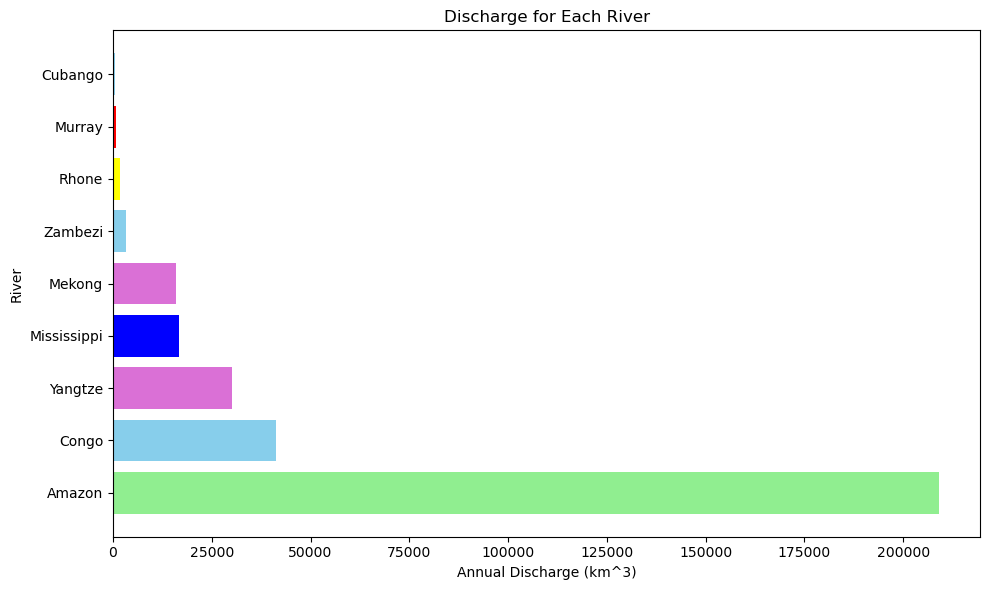

In [233]:

# Data
data = discharge

# Define colors for each continent
colors = {
    "South America": 'lightgreen',
    "Africa": 'skyblue',
    "Asia": 'orchid',
    "North America": 'blue',
    "Oceania": 'red',
    "Europe": 'yellow'
}

# Create a bar chart
plt.figure(figsize=(10, 6))


plt.barh(discharge["River"], discharge["Discharge"], color=[colors[c] for c in data["Continent"]])


# Add labels and a title
plt.xlabel('Annual Discharge (km^3)')
plt.ylabel('River')
plt.title('Discharge for Each River')

#plt.legend(colors, title="Continent", loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


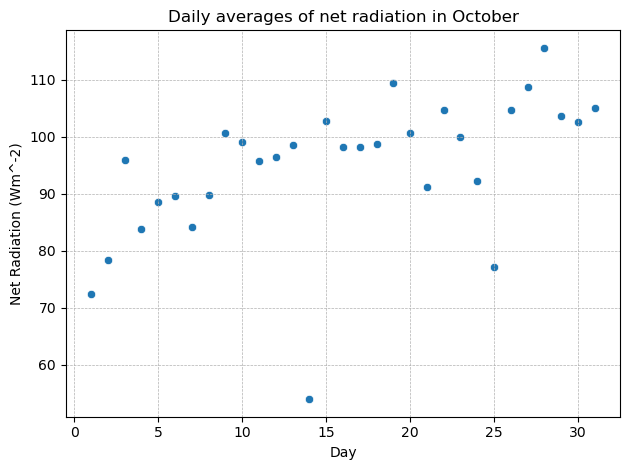

In [149]:
import seaborn as sns

sns.color_palette("viridis", as_cmap=True)
sns.scatterplot(data = daily_radiation, x='day',y='NET_RAD')

plt.xlabel('Day')
plt.ylabel('Net Radiation (Wm^-2)')
plt.title("Daily averages of net radiation in October")

plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='both')

plt.grid(True)
plt.tight_layout()
plt.show()

## Practice 8

- Export your rivers DataFrame to a CSV file in your repository’s data folder.

- Export your bsrn DataFrame to a CSV file in your repository’s data folder.

In [96]:
rivers.to_csv('../data/rivers.csv')
bsrn.to_csv('../data/bsrn.csv')